# Model Optimization and Nonlinear Models

CSC/DSC 340 Week 5 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: August 19, 2023

Last Modified: August 19, 2023

## Plan for the Week

**Monday**

Week 5 Pre-Class Homework and Week 4 In-Class Assignment Due

Lecture: Model Optimization and Nonlinear Models

**Tuesday**

Office Hours: 4pm - 6pm

**Wednesday**

Finish Lecture: Model Optimization and Nonlinear Models

Start Week 5 In-Class Assignment

Week 4 Post-Class Homework Due

**Thursday**

Office Hours: 11am - 1pm

**Friday**

In-Class Assignment Week 5

## Part 1: Hyperparameter Tuning

## Why do we need hyperparameter tuning
* The values of the hyperparameters change the output of the model
* Bad hyperparameters lead to bad results

In [1]:
##############################
##         IMPORTS          ##
##############################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import fetch_california_housing

* New data set: California Housing
    * Goal: Predict the price a house will sale for (house price/100k) given information about the house
    * In-Class Week 5

In [41]:
# Print the features
fetch_california_housing().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [2]:
##############################
##        IMPORT DATA       ##
##############################
X, y = fetch_california_housing(return_X_y = True)

In [3]:
##############################
##        SCALE DATA        ##
##############################
scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

In [4]:
##############################
##     TRAIN-TEST SPLIT     ##
##############################
X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.2)

MSE: 0.522669263962479


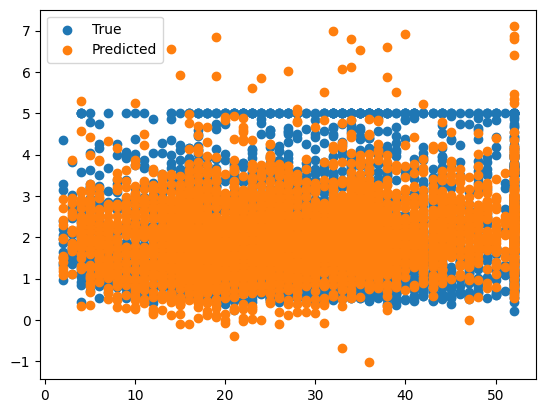

In [36]:
##############################
##        GOOD ALPHA        ##
##############################
ridge = Ridge(alpha=1e-15)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')
plt.legend()

MSE: 1.3447504358539897


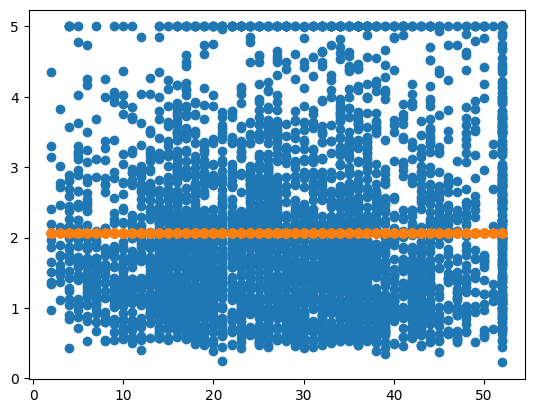

In [37]:
##############################
##        BAD ALPHA         ##
##############################
ridge = Ridge(alpha=1e15)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

## Methods for Hyperparameter Tuning

## Using Default Values
* Scikit-Learn sets the default value of $\alpha$ for ridge regression to 1.0, which is a reasonable high level of regularization

In [7]:
# Make the data set smaller (20k+ points in total)
# More points = more data to generate patterns BUT more run time
X = X[:1000]
y = y[:1000]

In [42]:
%%time
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

CPU times: user 28 ms, sys: 10.4 ms, total: 38.5 ms
Wall time: 20 ms


MSE: 0.5226731280619696


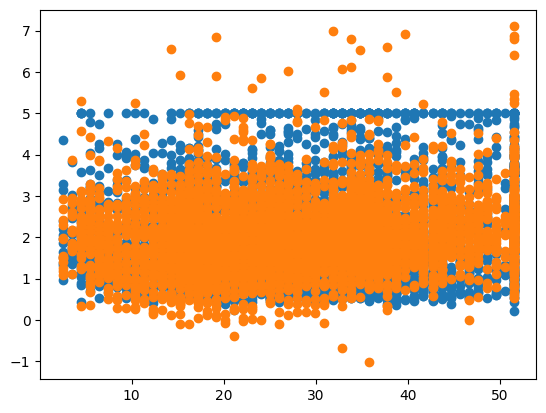

In [43]:
err = MSE(y_pred, y_test)
print("MSE:", err)

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

### Pros
* Fast and no need to modify the algorithm

### Cons
* Default value may not be the best value, but no test are done to check

## For Loop Tuning

* Use a for loop to check many different values for the hyperparameters
* Can use nested four loops if more than one hyperparamter

In [44]:
%%time
best_err = 1e4
best_alpha = None
for alpha in np.logspace(-15,4,1000):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    err = MSE(y_pred, y_test)
    
    if err < best_err:
        best_err = err
        best_alpha = alpha

CPU times: user 12.7 s, sys: 2.1 s, total: 14.8 s
Wall time: 2.06 s


MSE: 0.522669263962479
CHOSEN ALPHA: 1e-15


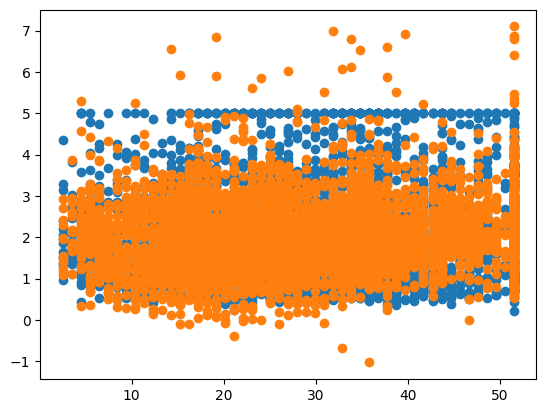

In [45]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)
print("CHOSEN ALPHA:", best_alpha)

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

### Pros
* Checks more than one value to find the best value
* Simple concept
* Short(ish) run times

### Cons
* Long piece of code
* Not checking all possible values of the hyperparameters

## GridSearchCV (Scikit-Learn)

* Scikit-Learn has several hyperparameter tuning implementation
* Grid search is a brute force algorithm which checks as many values as given 
    * If more than one hyperparameter, it checks every single possible combination
* "Same" test as for loops but gives much more information, but also takes longer

In [46]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':np.logspace(-15,4,5000)}

ridge = Ridge()

grid_search = GridSearchCV(ridge, parameters,\
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

{'alpha': 769.7988809964481} -0.5810420842093922
CPU times: user 6min 47s, sys: 1min 36s, total: 8min 24s
Wall time: 1min 8s


MSE: 0.5447985543384127
CHOSEN ALPHA: 769.7988809964481


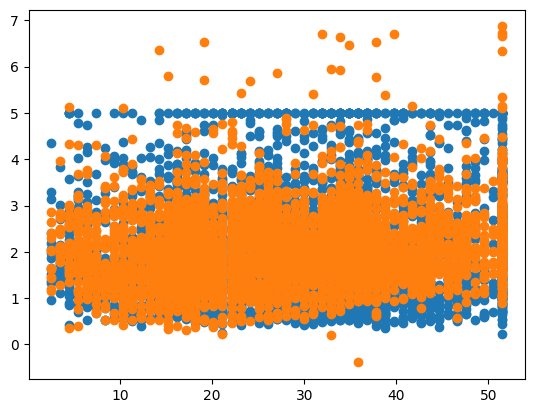

In [47]:
ridge = Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)
print('CHOSEN ALPHA:', grid_search.best_params_['alpha'])

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

### Pros
* Only takes a few lines to implement
* Gives a lot of data once it is fit

### Cons
* Long run times
* Only searches the range of parameters given

## RandomizedSearchCV (Scikit-Learn)

* Tries `n_iter` randomly chosen values for the hyperparmeters taken from a given distribution (uniform in this case)

In [14]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = {'alpha':uniform(loc=0, scale=4)}

ridge = Ridge()

random_search = RandomizedSearchCV(ridge, distributions,\
                                   scoring='neg_mean_squared_error', n_iter=5000)
random_search.fit(X_train, y_train)

print(random_search.best_params_, random_search.best_score_)

{'alpha': 3.9996960900779475} -0.6543411952901954
CPU times: user 6min 17s, sys: 1min 23s, total: 7min 40s
Wall time: 1min


MSE: 0.5226857312140524
CHOSEN ALPHA: 3.9996960900779475


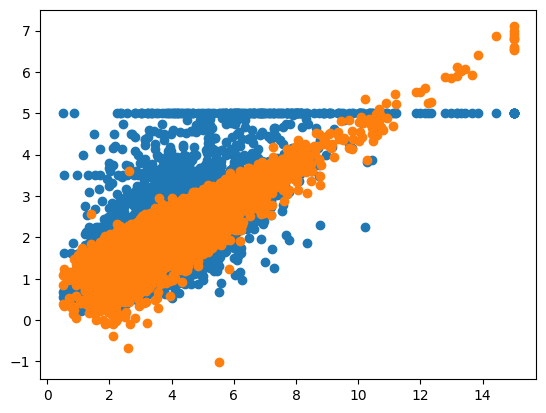

In [15]:
ridge = Ridge(alpha=random_search.best_params_['alpha'])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)
print('CHOSEN ALPHA:', random_search.best_params_['alpha'])

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

### Pros
* Only takes a few lines to implement
* Gives a lot of data once it is fit

### Cons
* Long run times (depending on value of `n_iter`)
* Only searches a finite number of parameter combinations

## Bayesian Ridge Regression

* Finds the "most likely" value for $\alpha$ using Bayesian stastics
* Leaves no uncertainity that the best value was just not sampled

In [16]:
%%time
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred = bayesian_ridge.predict(X_test)

print(bayesian_ridge.alpha_)

1.9045535832376832
CPU times: user 274 ms, sys: 907 ms, total: 1.18 s
Wall time: 157 ms


MSE: 0.5226760835562902
CHOSEN ALPHA: 1.9045535832376832


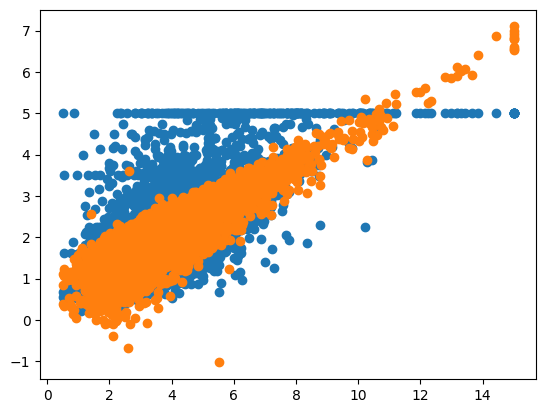

In [17]:
ridge = BayesianRidge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)
print('CHOSEN ALPHA:', ridge.alpha_)

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

### Pros
* Only takes a few lines to implement
* Statical certainity that the given $\alpha$ value is the best value
* Short run times

### Cons
* Only valid for Bayesian ridge regression (linear model)

## Comparison of $\alpha$, Accuracy, and Run Time
* Exact values depend on the train-test split and RandomizedSearch results; these values were taken from one run

In [30]:
labels = ['default', 'for loops', 'GridSearchCV', 'RandomizedSearchCV', 'Bayesian']
alphas = [1.0, 1e-15, 769.79, 3.99, 1.90]
mse = [0.522, 0.522, 0.544, 0.522, 0.522]
run_times = [20.8/1000, 1.35, 57.7, 7*60+40, 1.18] #ms

Text(0.5, 0, 'Hyperparameter Tuning Method')

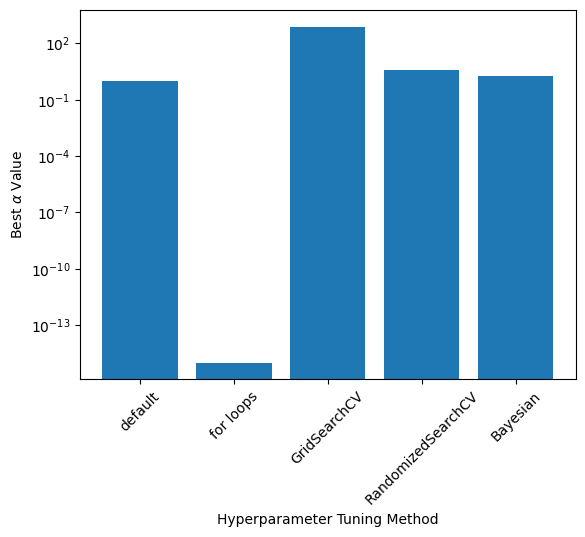

In [31]:
plt.bar(np.arange(0,len(labels)), alphas)
plt.yscale('log')
plt.xticks(np.arange(0,len(labels)), labels, rotation=45)
plt.ylabel(r"Best $\alpha$ Value")
plt.xlabel("Hyperparameter Tuning Method")

Text(0.5, 0, 'Hyperparameter Tuning Method')

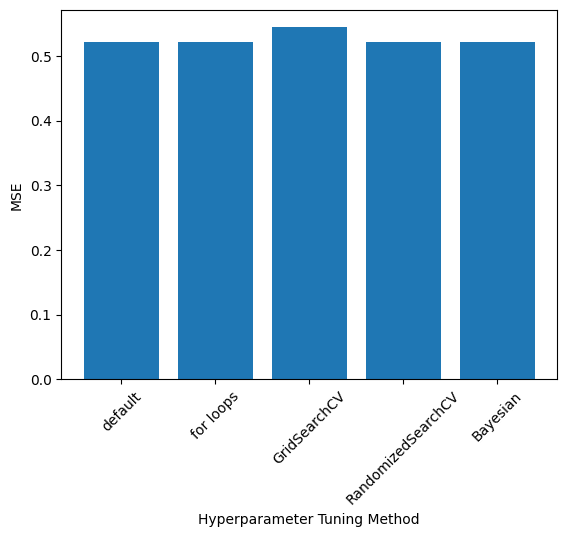

In [32]:
plt.bar(np.arange(0,len(labels)), mse)
plt.xticks(np.arange(0,len(labels)), labels, rotation=45)
plt.ylabel(r"MSE")
plt.xlabel("Hyperparameter Tuning Method")

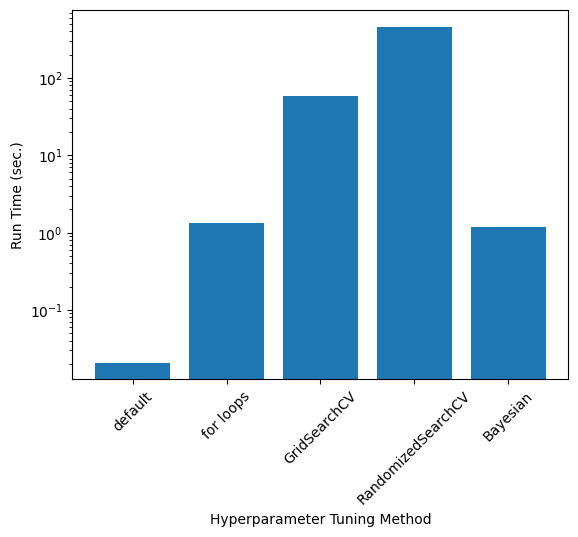

In [33]:
plt.bar(np.arange(0,len(labels)), run_times)
plt.xticks(np.arange(0,len(labels)), labels, rotation=45)
plt.ylabel(r"Run Time (sec.)")
plt.xlabel("Hyperparameter Tuning Method")
plt.yscale('log')

## Part 2: Feature Engineering

Feature engineering is the process of eliminating or altering given inputs in order to improve the model's predictions
    * Design matrix/alter the inputs
    * Remove features that are not useful
    * Scaling the features or targets

In [22]:
import pandas as pd
import seaborn as sns

housing = fetch_california_housing()

housing_data = pd.DataFrame(housing.data, columns=housing.feature_names)

housing_data['target'] = housing.target

housing_data = housing_data.sample(1000)

Pairplots can give us initial ideas about the data set and and obvious relations

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


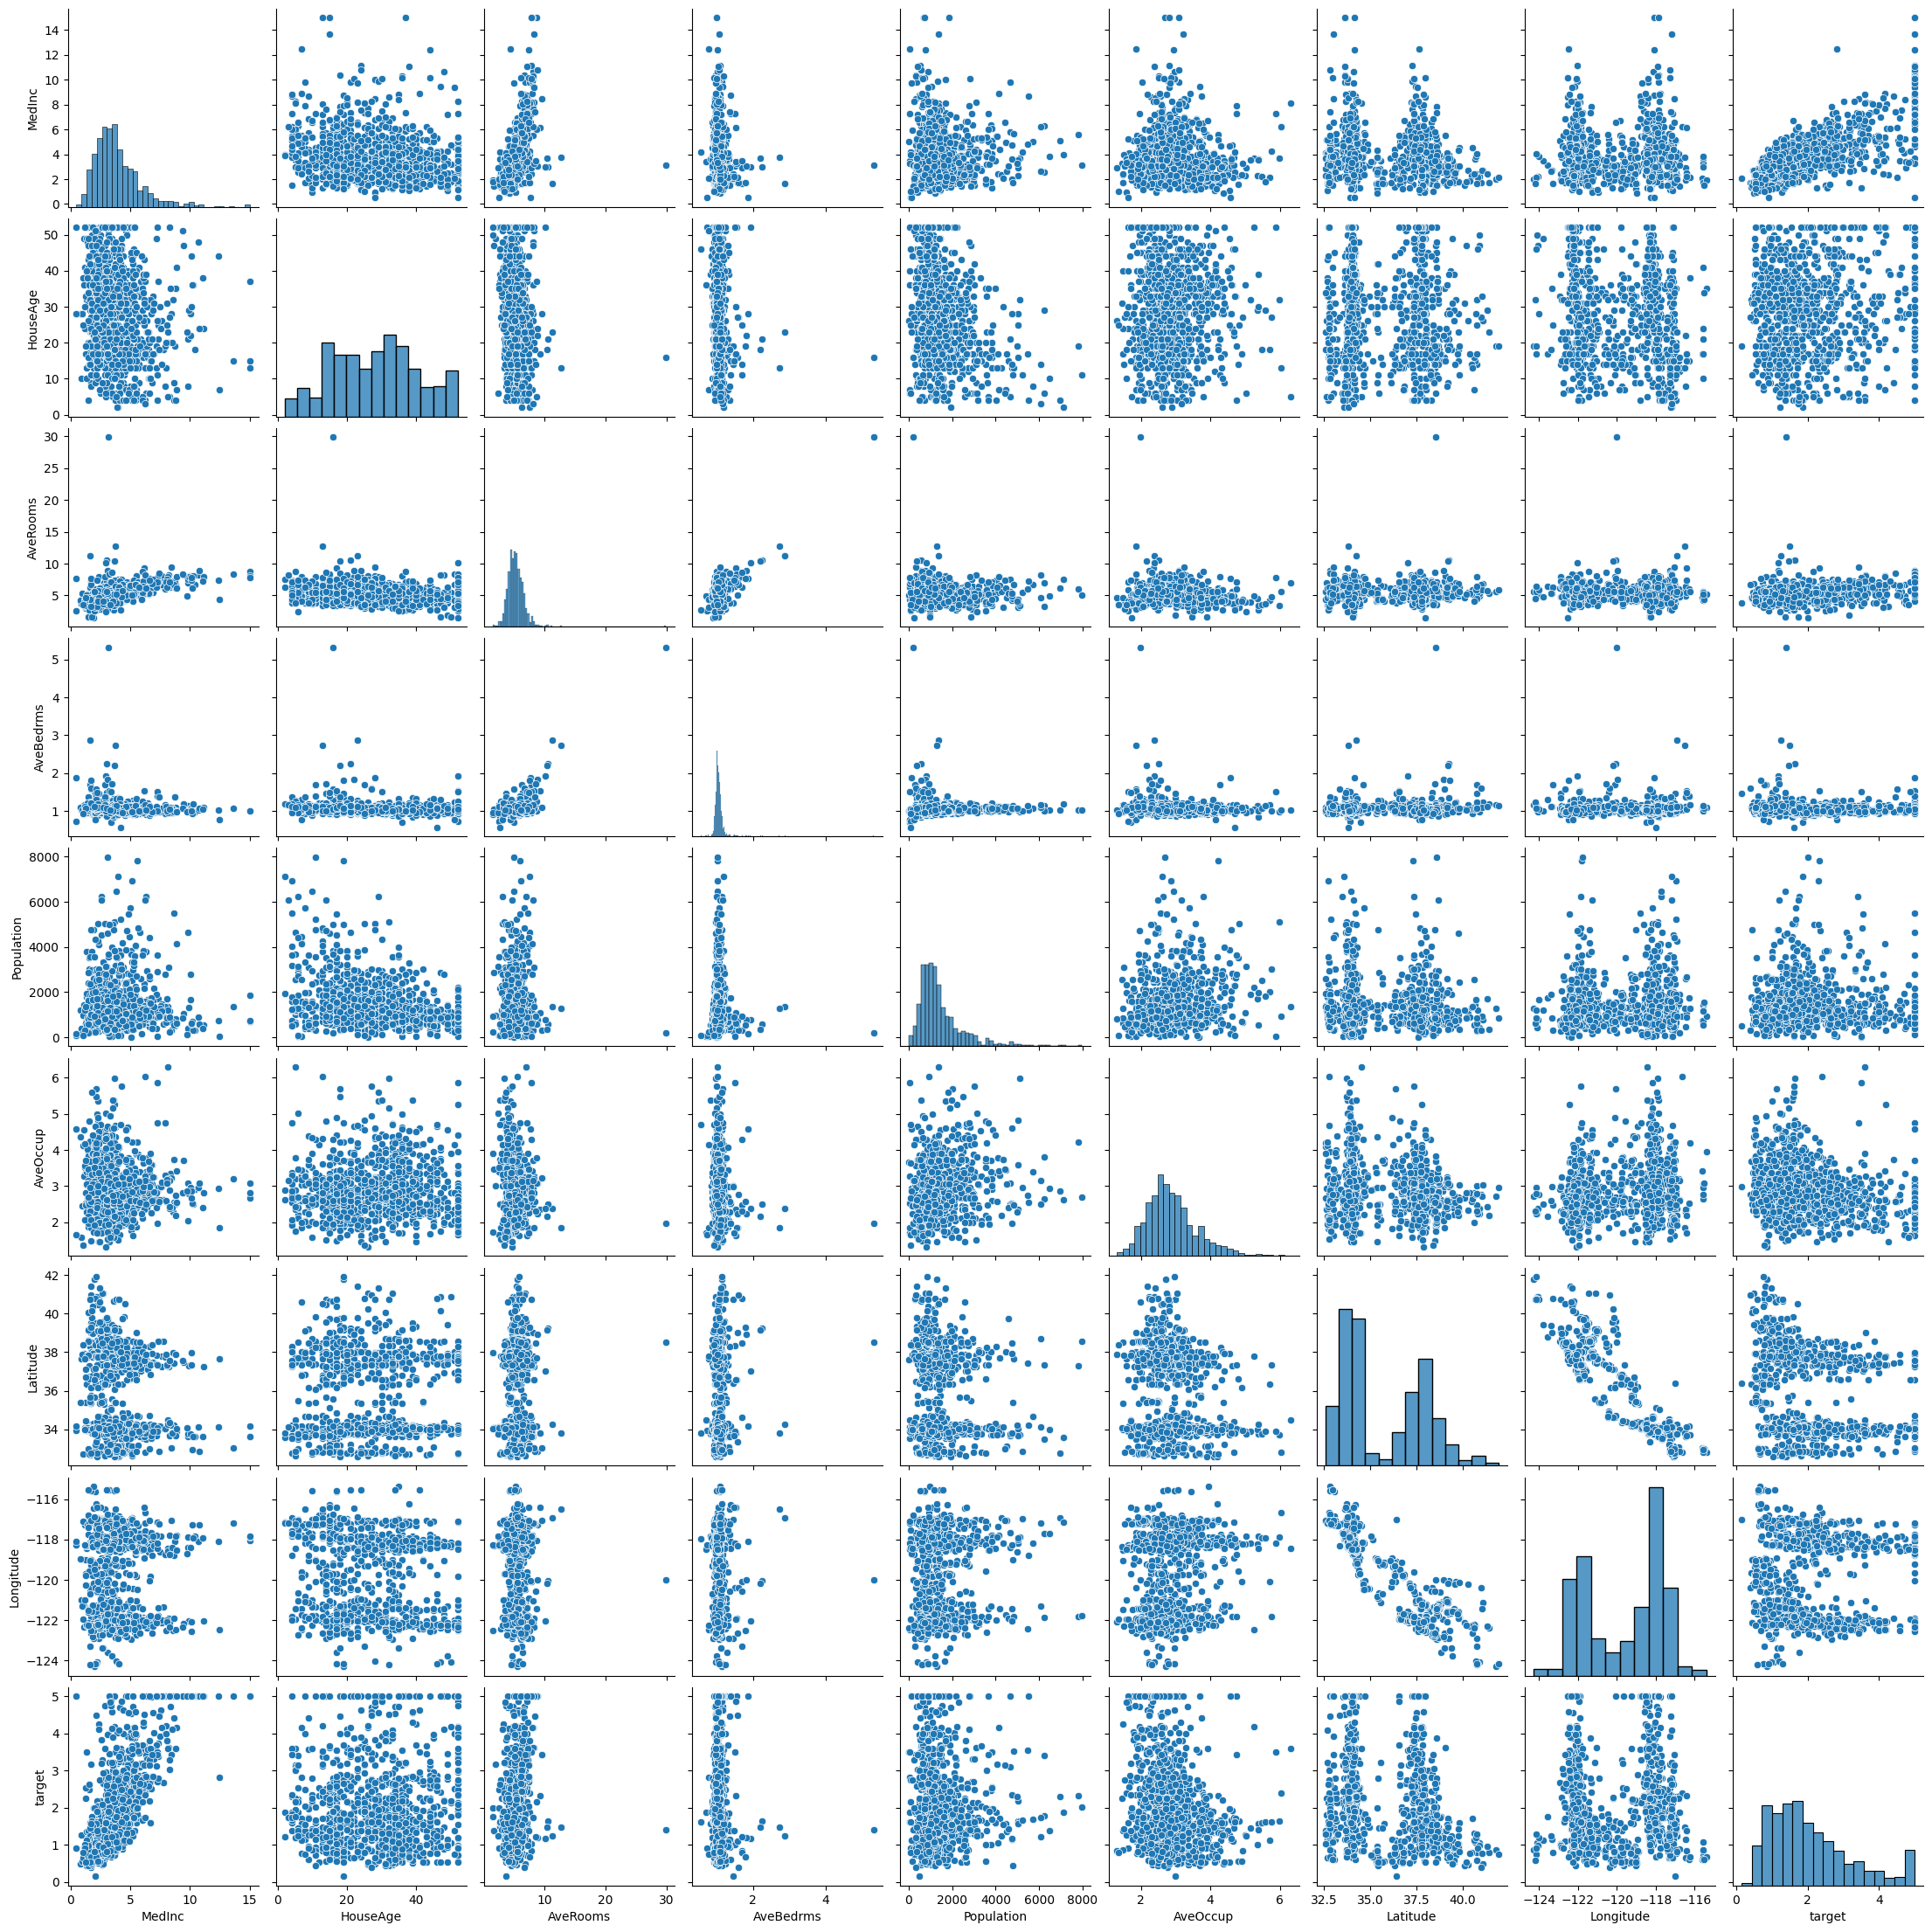

In [24]:
sns.pairplot(housing_data)

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


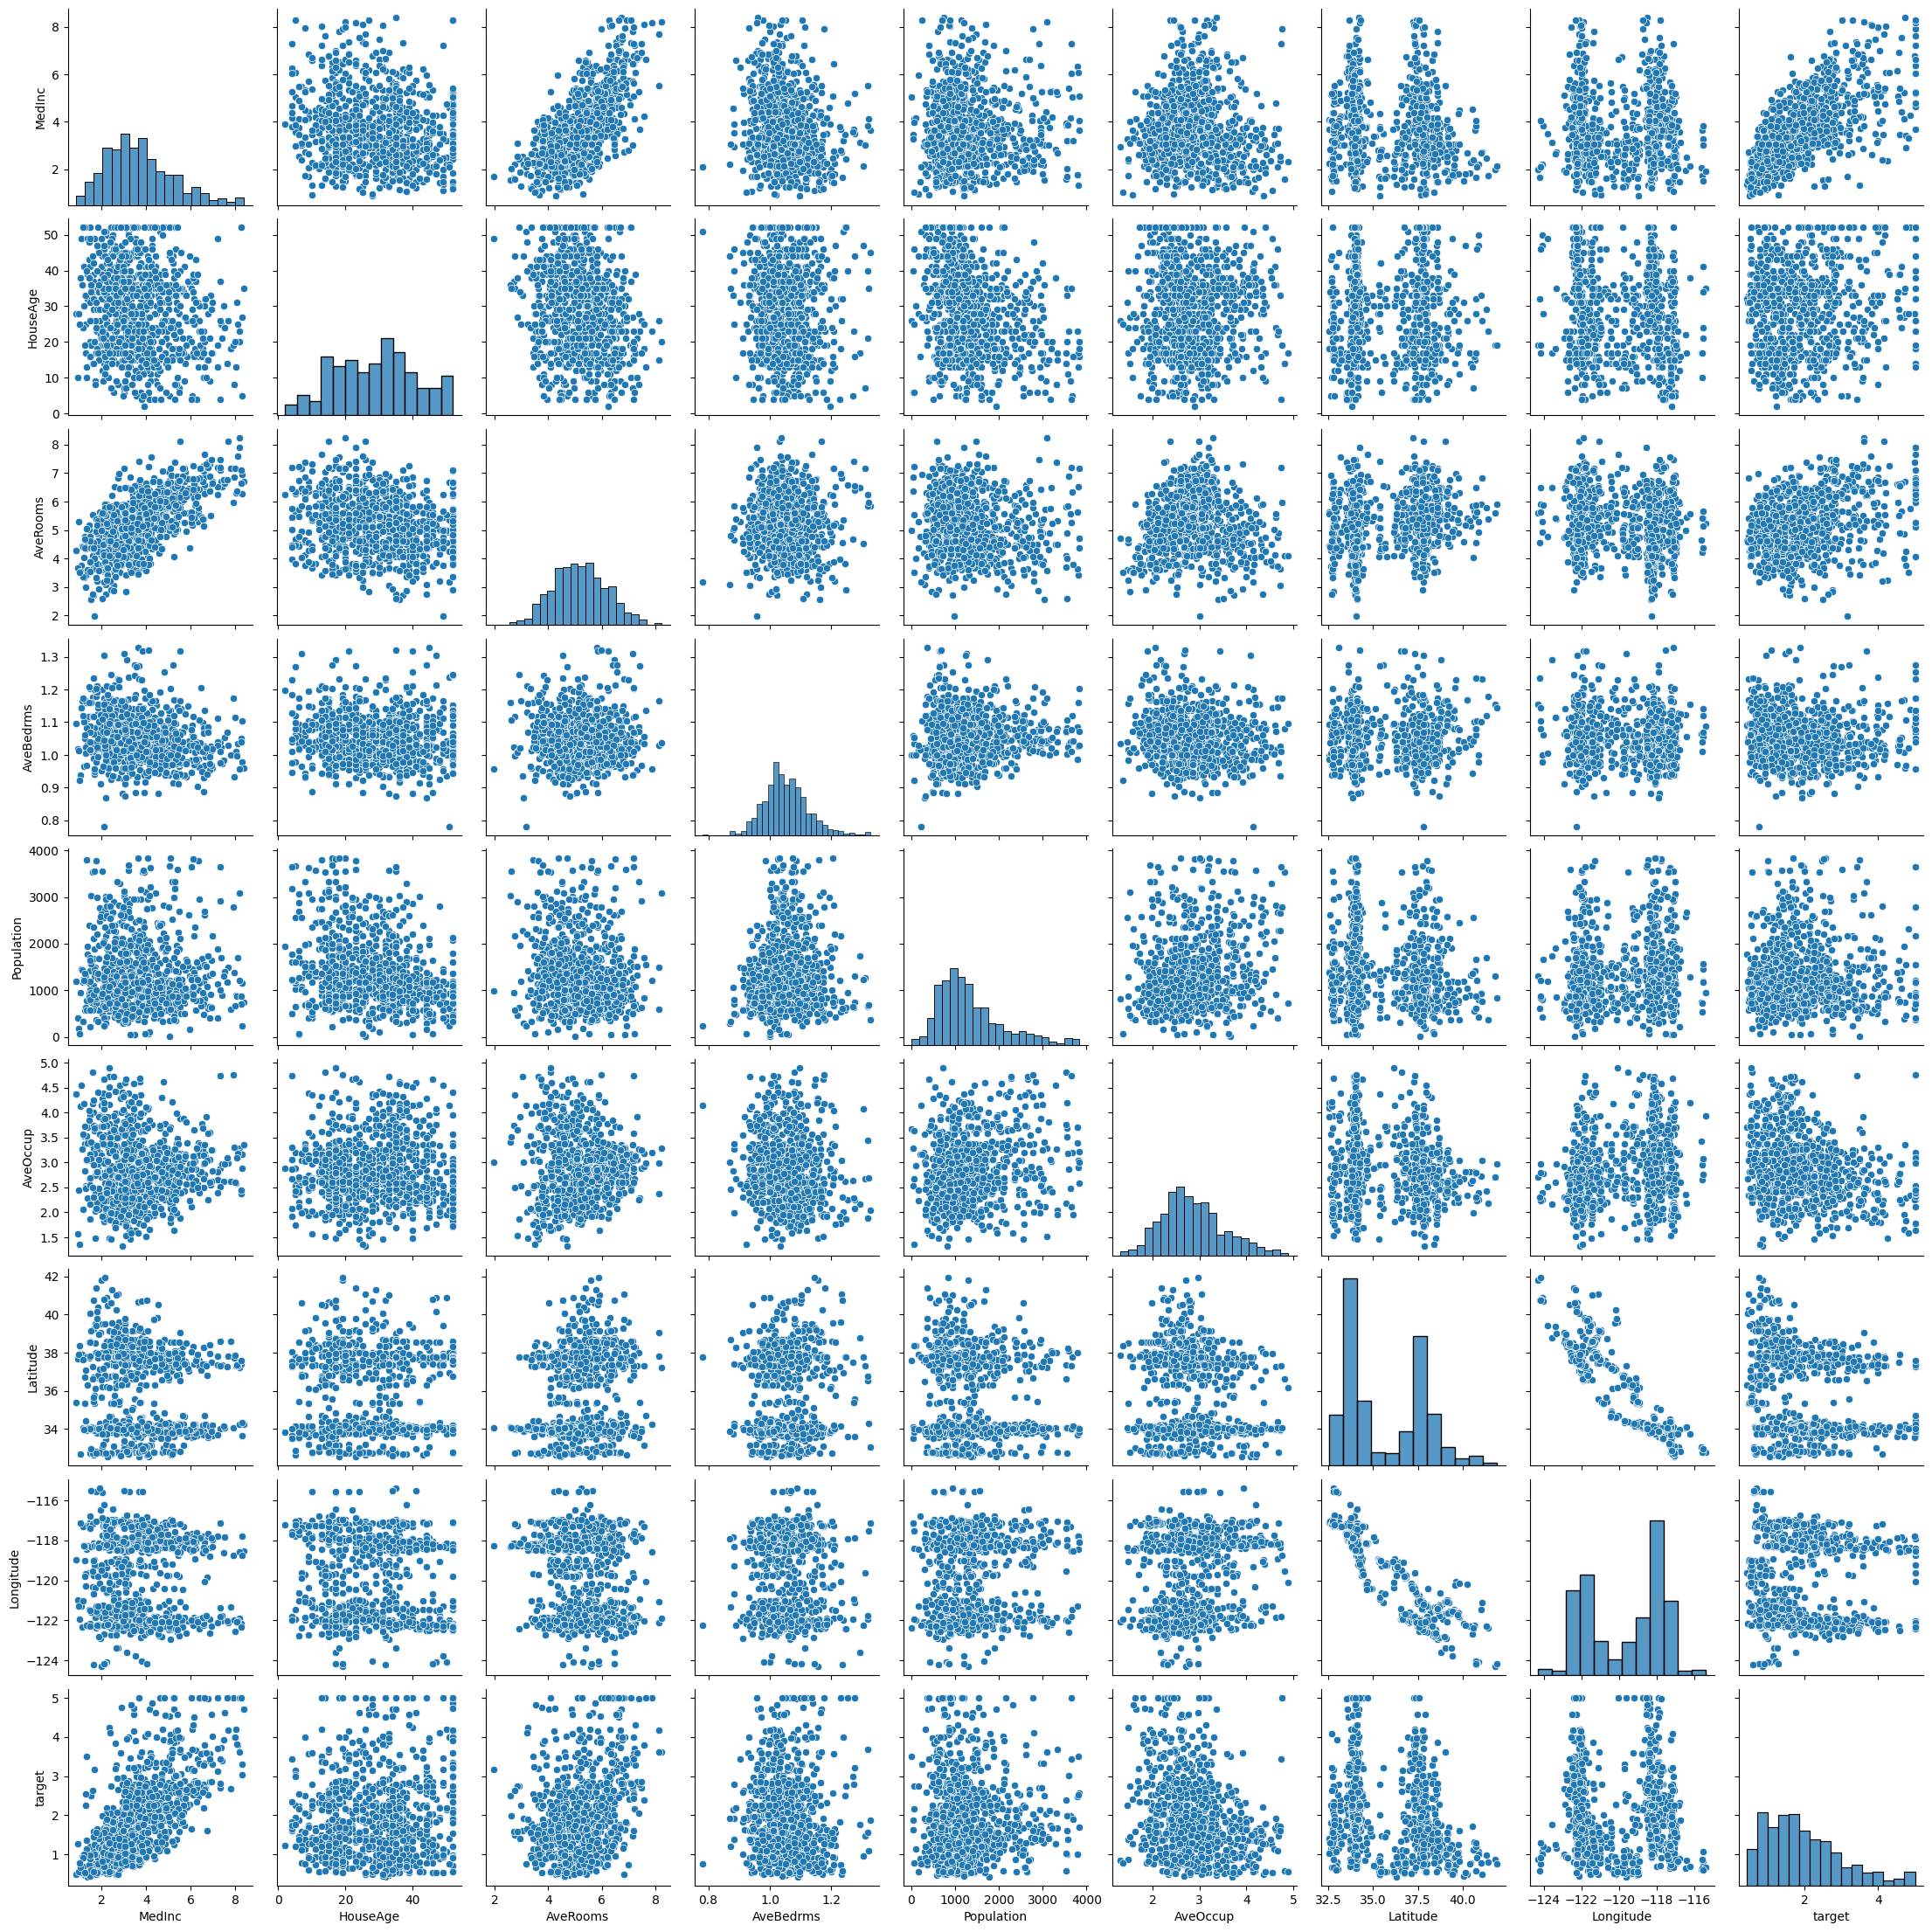

In [49]:
# Remove outliers from the data set and make the pairplot again

from scipy import stats

housing_data = housing_data[(np.abs(stats.zscore(housing_data)) < 3).all(axis=1)]

sns.pairplot(housing_data)

## Correlation Matrix

* Correlation score = $\sqrt{R2\ Score}$
* Values close to $\pm1$ means that the two feautures are linearly related

In [27]:
correlation_matrix = housing_data.corr()
correlation_matrix

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.169294  0.670516  -0.152712   -0.005359 -0.031411   
HouseAge   -0.169294  1.000000 -0.229041  -0.120792   -0.317868 -0.004349   
AveRooms    0.670516 -0.229041  1.000000   0.172828   -0.103463 -0.016651   
AveBedrms  -0.152712 -0.120792  0.172828   1.000000    0.000680 -0.148745   
Population -0.005359 -0.317868 -0.103463   0.000680    1.000000  0.212795   
AveOccup   -0.031411 -0.004349 -0.016651  -0.148745    0.212795  1.000000   
Latitude   -0.035370  0.014683  0.184089   0.046721   -0.100730 -0.151536   
Longitude  -0.080544 -0.099682 -0.155785   0.006864    0.089385  0.164193   
target      0.690016  0.089970  0.336599   0.002669   -0.042583 -0.257071   

            Latitude  Longitude    target  
MedInc     -0.035370  -0.080544  0.690016  
HouseAge    0.014683  -0.099682  0.089970  
AveRooms    0.184089  -0.155785  0.336599  
AveBedrms   0.046721   0.006864  0.002669  
Population -0.100730   0.089385 -0.042583  
AveOccup   -0.151536   0.164193 -0.257071  
Latitude    1.000000  -0.927176 -0.157419  
Longitude  -0.927176   1.000000 -0.047067  
target     -0.157419  -0.047067  1.000000

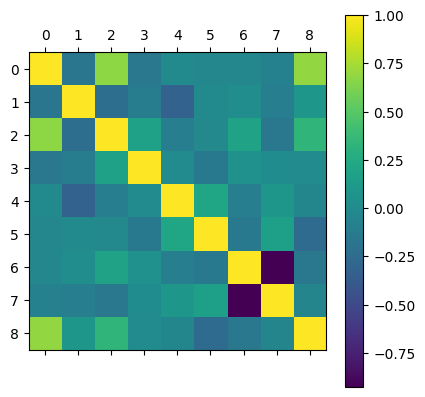

In [28]:
plt.matshow(correlation_matrix)
plt.colorbar()

## LASSO Regression for Feature Selection

In [39]:
X = housing_data.drop(columns=['target'])
y = housing_data['target']
scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

In [40]:
lasso = Lasso()
lasso.fit(Z,y)
lasso.coef_

array([ 0.,  0.,  0.,  0., -0., -0., -0., -0.])

## Accuracy with All Data (Scaled)

In [48]:
X = housing_data.drop(columns=['target'])
y = housing_data['target']

scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.2)

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred = bayesian_ridge.predict(X_test)

print('MSE:', MSE(y_pred, y_test))

MSE: 0.28607251533045863


## Accuracy with Most Correlated Features (Scaled)

In [50]:
X_corr = housing_data[['MedInc', 'HouseAge', 'AveRooms']]
y = housing_data['target']

scaler = StandardScaler()
scaler.fit(X_corr)
Z = scaler.transform(X_corr)

X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.2)

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred = bayesian_ridge.predict(X_test)

print('MSE:', MSE(y_pred, y_test))

MSE: 0.6282824240335132


## Part 3: Nonlinear Models

## Kernel Ridge Regression (KRR)

* All previous models we have studied have been linear--capable of modeling linear patterns
    * Design matrices can only add some much functions
* Many data sets will have a nonlinear pattern and thus we need a nonlinear model
    * Kernel ridge regression (KRR)
    * Support vector machines (SVMs)
    * Neural Networks

### Kernel Functions
* Scikit-Learn kernels are found [here](https://scikit-learn.org/stable/modules/metrics.html)

    * Linear: $k(x,y) = x^Ty$
    * Polynomial: k(x,y) = $(\gamma x^Ty+c_0)^d$
    * Sigmoid: $k(x,y) = tanh(\gamma x^Ty+c_0)$
    * Radial Basis Function (RBF): $k(x,y) = exp(-\gamma||x-y||_2)$

* Inputs to KRR algorithm are modified by the kernel function, thus giving the method nonlinearuty $\longrightarrow$ kernel methods/trick allows linear methods to solve nonlinear problems
    * Kernel ridge regression is just ridge regression with the inputs modified by the kernel function

### KRR Equations

* Form of predictions: $\hat{y}(x) = \sum_{i=1}^m k(x_i,x)$
* Loss function:$J(\theta) = MSE(y,\hat{y}) + \frac{\alpha}{2}\sum_{i=1}^n\theta_i^2$
* Optimized parameters: $\theta = (\textbf{K}-\alpha\textbf{I})y$
    * $\textbf{K} = k(x_i, x_j)$

### Hyperparameter Tuning with Many Hyperparameters
* KRR has the same hyperparameter as ridge regression: $\alpha$
* Each kernel function has 0-3 hyperparameters
* The choice of kernel function is a hyperparameter
* Hyperparameter tuning becomes more important as the number of hyperparameters in the model increases

## Housing Data with Kernel Ridge Regression

In [ ]:
X,y = fetch_california_housing(return_X_y=True)

X = X[:500]
y = y[:500]

scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.2)

In [ ]:
from sklearn.kernel_ridge import KernelRidge

distributions = {'alpha':uniform(loc=0, scale=4), 'kernel':['linear', \
                                                            'polynomial', 'rbf', \
                                                            'sigmoid', 'laplacian'], \
                 'gamma':uniform(loc=0, scale=4),\
                'degree':uniform(loc=0, scale=4), 'coef0':uniform(loc=0, scale=4)}

krr = KernelRidge()

random_search = RandomizedSearchCV(krr, distributions,\
                                   scoring='neg_mean_squared_error', n_iter=50)
random_search.fit(X_train, y_train)
print(random_search)
print(random_search.best_params_, random_search.best_score_)

In [ ]:
X,y = fetch_california_housing(return_X_y=True)

scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Z,y,test_size=0.2)

In [ ]:
# Using the best parameters from through one run of the 
# RandomizedSearchCV method above
krr = KernelRidge(alpha=2.0273259037561155, coef0= 0.3919218857944897,\
                  degree=3.0448055366727673, gamma= 0.1166341290662456,\
                  kernel= 'laplacian')
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)
print('MSE:', MSE(y_pred, y_test))

In [ ]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred = bayesian_ridge.predict(X_test)
print('MSE:', MSE(y_pred, y_test))